<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

## Table of Content

1. **[Data Preprocessing](#dp)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [23]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#### Load the csv file

In [24]:
# load the csv file
df_bank = pd.read_csv('bank.csv')

# display the first five observations
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [25]:
# check data types of variables
df_bank.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Outlier analysis**

In [26]:
# check the size of data
df_bank.shape

(9640, 11)

In [27]:
Q1 = df_bank.quantile(0.25)
Q3 = df_bank.quantile(0.75)
IQR = Q3 - Q1
df_bank = df_bank[~((df_bank < (Q1 - 1.5 * IQR)) | (df_bank > (Q3 + 1.5 * IQR))).any(axis=1)]
df_bank = df_bank.reset_index(drop=True)
df_bank.shape

(6555, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the dependent and independent variables.

In [28]:
df_target = df_bank['y']
df_feature = df_bank.drop('y', axis = 1)

In [29]:
for i in range(len(df_target)):
    if df_target[i] == 'yes':
        df_target[i] = 0
    else:
        df_target[i] = 1
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

<ipython-input-29-339077a10510>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[i] = 1
<ipython-input-29-339077a10510>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target[i] = 0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
df_feature = df_feature.replace(to_replace='unknown', value=np.nan)

# print the first 5 observations
df_feature.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0
1,25,243,3,999,0,-1.8,92.843,-50.0,1.531,5099.1
2,36,214,1,999,0,-0.1,93.200,-42.0,4.120,5195.8
3,43,550,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,52,64,1,999,0,1.1,93.994,-36.4,4.855,5191.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [31]:
Total = df_feature.isnull().sum().sort_values(ascending=False)          
Percent = (df_feature.isnull().sum()*100/df_feature.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0
cons.price.idx,0,0.0
emp.var.rate,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
age,0,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# find the standard deviation for the numeric variables
df_feature.std()

age                10.184894
duration          253.406706
campaign            1.283539
pdays               0.000000
previous            0.000000
emp.var.rate        1.626927
cons.price.idx      0.585132
cons.conf.idx       4.659679
euribor3m           1.779666
nr.employed        74.431765
dtype: float64

**Interpretation:** The variables `pdays` and `previous` have standard deviation 0.

In [33]:
# create a list of the columns to drop
columns_to_remove = ['pdays', 'previous']
df_feature = df_feature.drop(columns=columns_to_remove, axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Distribution of numeric independent variables.**

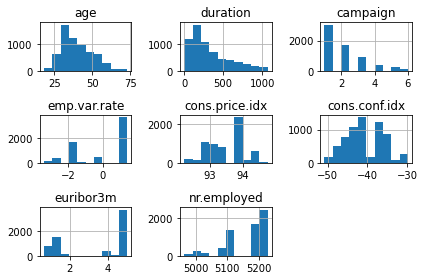

age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
euribor3m        -0.545969
nr.employed      -0.880652
dtype: float64

In [34]:
df_feature.hist()
plt.tight_layout()
plt.show()  
df_feature.skew()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

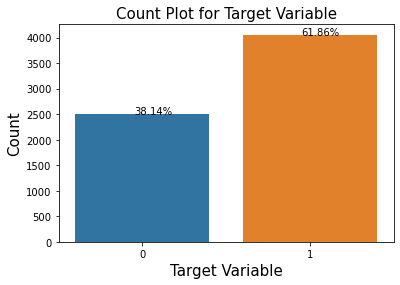

In [35]:
df_target.value_counts()
# plot the countplot of the target variable
sns.countplot(x = df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [36]:
# initialize the standard scalar
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_feature)
X = pd.DataFrame(num_scaled, columns = df_feature.columns)
X.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.722787,-0.480765,-0.024486,0.701361,0.749298,0.910658,0.765585,0.394074
1,-1.410132,-0.330797,0.754670,-1.081276,-1.217928,-2.008221,-1.104009,-0.840708
2,-0.330018,-0.445246,-0.803642,-0.036282,-0.607764,-0.291233,0.350869,0.458567
3,0.357326,0.880787,-0.803642,0.701361,0.749298,0.910658,0.765023,0.394074
4,1.241055,-1.037225,-0.803642,0.701361,0.749298,0.910658,0.763899,0.394074


<a id="nb"> </a>
## 2. Naive Bayes

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5244, 8)
y_train (5244,)
X_test (1311, 8)
y_test (1311,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [48]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
       
    cm = confusion_matrix(y_test, y_pred)
   
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                              index = ['Actual:0','Actual:1'])
  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)
    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)
    plt.show()

#### Define a function to plot the ROC curve.

In [49]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
     
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
  
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
model = gnb.fit(X_train, y_train)

# predict the attrition for test set
y_pred = gnb_model.predict(X_test)

# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       492
           1       0.84      0.76      0.80       819

    accuracy                           0.76      1311
   macro avg       0.75      0.76      0.75      1311
weighted avg       0.77      0.76      0.76      1311



**Interpretation:** The recall for the positive class (i.e. customers who will subscribe) and the recall of the negative class (i.e. customers who will not subscribe) are stable.
Thus, we can say that our model is performing good.

Note: Recall for the positive class is also known as Sensitivity and Recall for the negative class is also known as Specificity.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 10.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

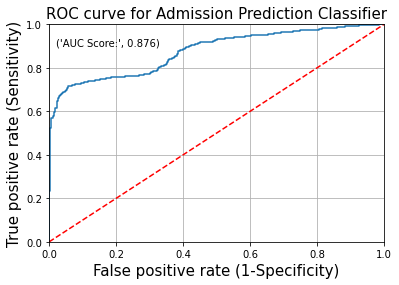

In [51]:
# plot the ROC curve
plot_roc(gnb_model)

In [57]:
y_pred_prob = model.predict_proba(X_test)[:,1]
   
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
print(round(roc_auc_score(y_test, y_pred_prob),4))


0.876


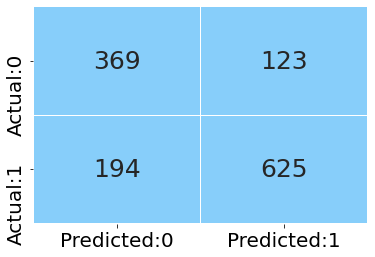

In [53]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(gnb_model)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()
   
# fit the model using 'cross_val_score'
# pass the gnb model as 'estimator'
# use 10-fold cross validation
score = cross_val_score(gnb, X_train, y_train, cv = 10)

# calculate the mean score
score = score.mean()

print("Accuracy after 10 fold cross validation: ", round(score, 2))

Accuracy after 10 fold cross validation:  0.78
